In [86]:
# for numerical computing
import numpy as np
# for dataframes
import pandas as pd
# for easier visualization
import seaborn as sns
# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline
# import color maps
from matplotlib.colors import ListedColormap
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
from math import sqrt
# to split train and test set
from sklearn.model_selection import train_test_split
# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge # Linear Regression + L2 regularizat
from sklearn.linear_model import Lasso # Linear Regression + L1 regularizat
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae
#import xgboost
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\ming64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

# to save the final model on disk
from sklearn.externals import joblib

In [87]:
np.set_printoptions(precision=2, suppress=True) #for printing floating point

In [88]:
df = pd.read_csv('listings.csv')

In [89]:
df.shape

(6202, 16)

In [90]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [149]:
df.dtypes

id                                  int64
name                               object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [91]:
df.head(8)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36524,-71.02936,Entire home/apt,125,30,15,2019-02-22,0.33,1,76
1,5506,**$99 Special ** Private! Minutes to center!,8229,Terry,NaN,Roxbury,42.32981,-71.09559,Entire home/apt,145,3,84,2019-04-08,0.69,6,189
2,6695,$99 Special!! Home Away! Condo,8229,Terry,NaN,Roxbury,42.32994,-71.09351,Entire home/apt,169,3,86,2019-04-13,0.73,6,151
3,6976,Mexican Folk Art Showcase in Boston Neighborhood,16701,Phil,NaN,Roslindale,42.29244,-71.13577,Private room,65,3,75,2018-10-23,0.63,1,93
4,8789,Curved Glass Studio/1bd facing Park,26988,Anne,NaN,Downtown,42.35919,-71.06265,Entire home/apt,99,28,22,2018-12-20,0.39,9,260
5,9765,[1294] Grand Studio - South End,25188,Seamless,NaN,South End,42.34259,-71.07942,Entire home/apt,229,2,9,2015-10-24,0.10,34,327
6,9824,[1273] Fab Studio- close to Newbury,25188,Seamless,NaN,Back Bay,42.34950,-71.08595,Entire home/apt,209,2,23,2018-10-25,0.24,34,344
7,9857,"[1280] Well-Appointed, 2 BR Suite in Back Bay",25188,Seamless,NaN,Back Bay,42.35429,-71.07277,Entire home/apt,342,2,25,2018-10-19,0.27,34,321


# Drop columns with unnecearry values

In [92]:
df = df.drop(['host_id'], axis = 1) 

In [93]:
df = df.drop(['neighbourhood_group'], axis = 1)

In [94]:
df = df.drop(['host_name'], axis = 1)

# Checking the neighbouhood 

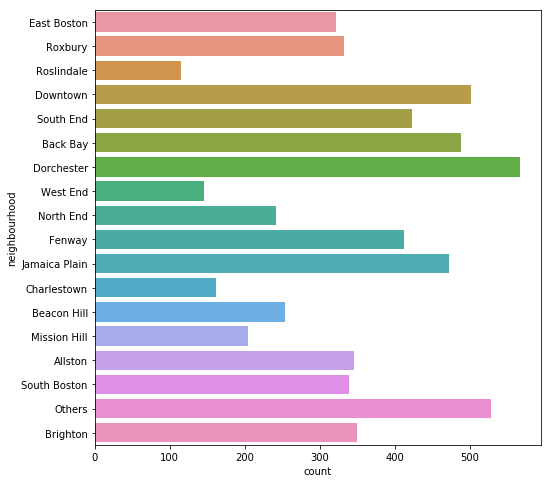

In [148]:
plt.figure(figsize=(8,8))
sns.countplot(y='neighbourhood', data = df)
plt.rcParams['figure.figsize']=(10,6)

# Removing some neighbourhood because it is not popular

In [96]:
df.neighbourhood.replace(['Hyde Park','Leather District','South Boston Waterfront','Chinatown'],'Others',inplace=True)

In [97]:
df.neighbourhood.replace(['West Roxbury','Bay Village','Longwood Medical Area','Mattapan'],'Others',inplace=True)

# Finding the top neighbourhood in a bar graph

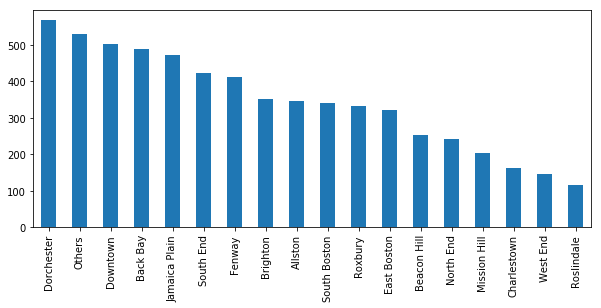

In [146]:
visua = df.neighbourhood.value_counts().plot(kind='bar')
plt.rcParams['figure.figsize']=(10,6)

# A pie chart

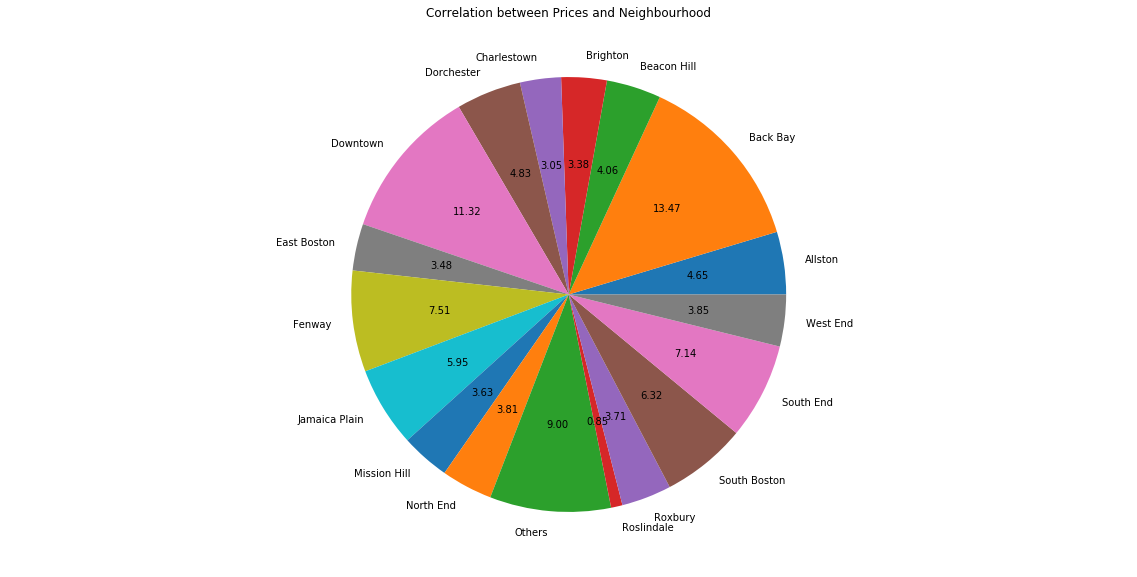

In [127]:
sums = df.price.groupby(df.neighbourhood).sum()
plt.axis('equal')
plt.pie(sums, labels=sums.index,autopct = "%.2f",labeldistance=1.1 )
plt.title("Correlation between Prices and Neighbourhood")
plt.rcParams['figure.figsize']=(20,10)
plt.show()